In [45]:
#Import helpful packages to load in

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
#read input files and display top 5 rows data

path = "./Data/"
match_df = pd.read_csv(path + "matches.csv")
score_df = pd.read_csv(path + "deliveries.csv")
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [47]:
#Get match & season total stats

print("Number of played matches" , match_df.shape[0])
print("Number of played seasons", len(match_df.season.unique()))

Number of played matches 756
Number of played seasons 12


<b>Number of matches each season :</b>

Let's find no. of matches played per season

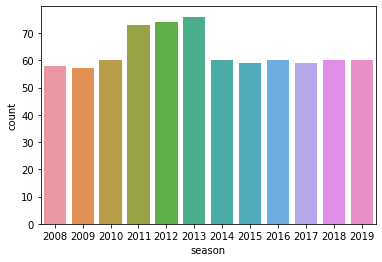

In [48]:
sns.countplot(x='season', data=match_df)
plt.show()

<b> Number of matches in each venue : </b>

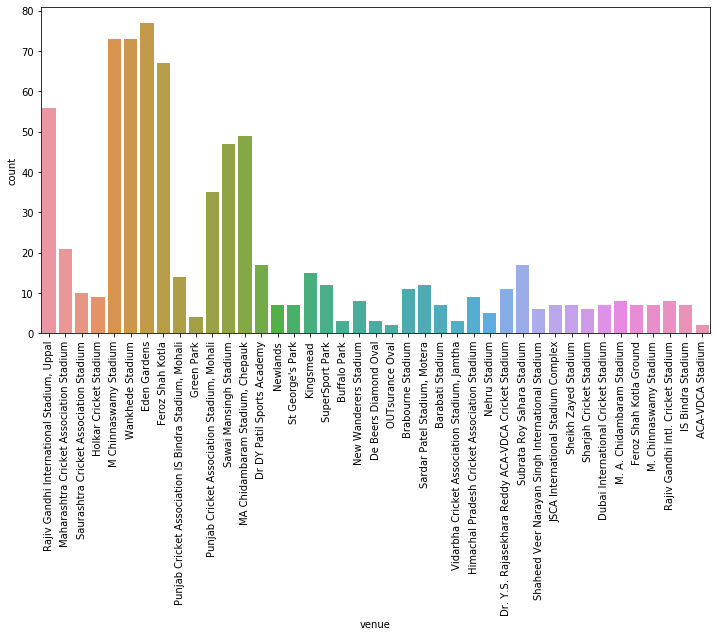

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='venue', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

There are few venues present in the data with "Eden Gardens" being one with most number of matches followed by "Wankhede Stadium"

<b> Number of matches played by each team : </b>

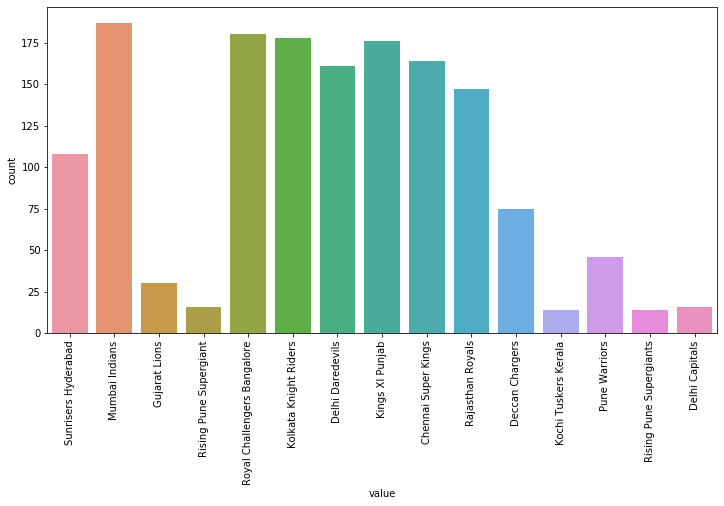

In [50]:
temp_df = pd.melt(match_df, id_vars=['id', 'season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(12, 6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation = 'vertical')
plt.show()

here we can see "Mumbai indians" played most of the matches followed by "Royal challengers Banglore"

<b> Number of wins per team : </b>

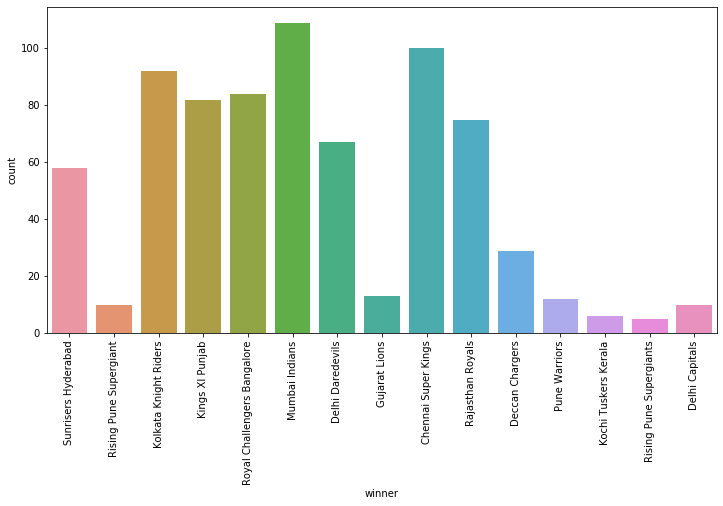

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(x='winner', data=match_df)
plt.xticks(rotation = 'vertical')
plt.show()

Here "Mumbai indians" leads the pack followed by "CSK"

<b>Champions each season : </b>
let's see champions in each season.

In [52]:
temp_df = match_df.drop_duplicates(subset='season', keep='last')[['season','winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


<b> Toss decision : </b> <br>
Let us see the toss decision taken so far

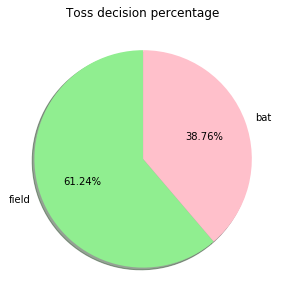

In [53]:
temp_series = match_df.toss_decision.value_counts()
lables = (np.array(temp_series.index))
sizes = (np.array(temp_series / temp_series.sum()) * 100)
colors = ['lightgreen', 'pink']
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=lables, colors=colors, autopct='%2.2f%%', shadow=True, startangle=90)
plt.title('Toss decision percentage')
plt.show()

Almost 61% of the toss decisions are made field first, Now let us see how this decision varied over time.

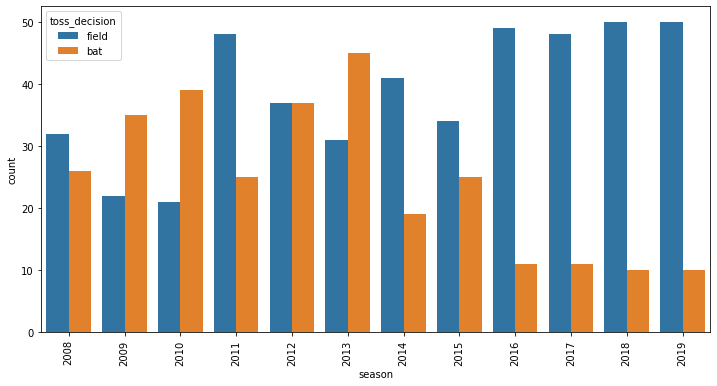

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(x='season', hue = 'toss_decision', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

it seems during initial years, teams wanted to bat first.! Loos at 2019 season, Most of the toss decisions are to field first.
<br>
<br>
Since there are strong trends towards batting second let us see the percentage of teams batting secons.

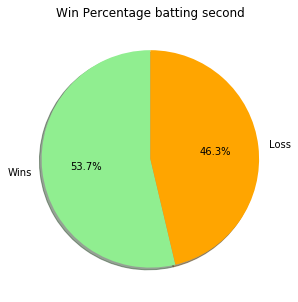

In [55]:
n_wins = (match_df.win_by_wickets>0).sum()
n_loss = (match_df.win_by_wickets == 0).sum()
lables = ['Wins', 'Loss']
total = float(n_wins + n_loss)
sizes = [(n_wins/total)*100, (n_loss/total)*100]
colors = ['lightGreen','Orange']
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=lables, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win Percentage batting second")
plt.show()

So percentage of times teams batting second has won is 53.7, let's split this by year and see distribution

/Users/baps/Documents/Anaconda3_env/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


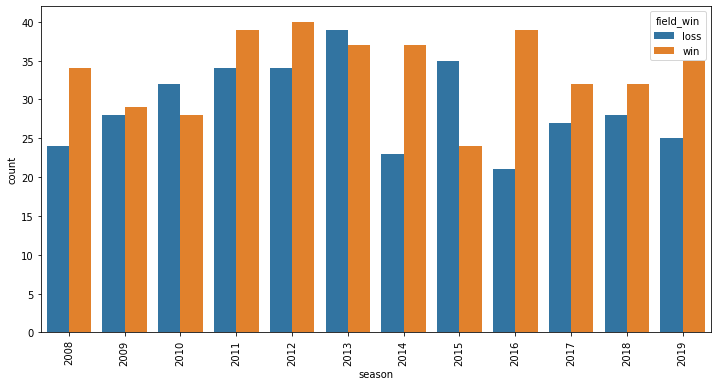

In [56]:
match_df['field_win'] = "win"
match_df['field_win'].loc[match_df['win_by_wickets']==0] = 'loss'
plt.figure(figsize=(12, 6))
sns.countplot(x='season', hue='field_win', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

Number of wins batting second is also quite high in the latest season (2019)
<br>
<b> Top players of the match :</b>

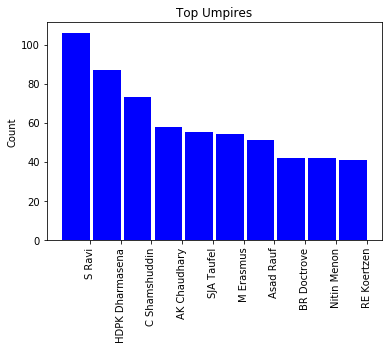

S Ravi             106
HDPK Dharmasena     87
C Shamshuddin       73
AK Chaudhary        58
SJA Taufel          55
M Erasmus           54
Asad Rauf           51
BR Doctrove         42
Nitin Menon         42
RE Koertzen         41
Name: value, dtype: int64

In [57]:
temp_df = pd.melt(match_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
temp_series = temp_df.value.value_counts()[:10]
lables = np.array(temp_series.index)
ind = np.arange(len(lables))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='b')
ax.set_xticks(ind + ((width)/2.))
ax.set_xticklabels(lables, rotation='vertical')
ax.set_ylabel('Count')
ax.set_title('Top Umpires')
plt.show()
temp_series

S Ravi seems to be most finest umpire for IPL matches followed by Dharmasena. <br><br>
<b>How lucky the toss winning teams ? </b>

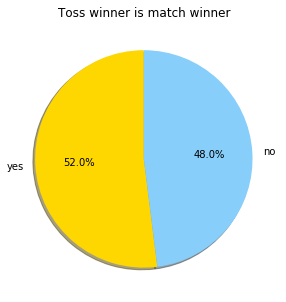

In [58]:
match_df['toss_winner_is_winner'] = 'no'
match_df['toss_winner_is_winner'].loc[match_df.toss_winner == match_df.winner] = 'yes'
temp_series = match_df.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum()) * 100))
colors = ['gold', 'lightskyblue']
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Toss winner is match winner')
plt.show()

The chance is somehow more who wins the toss. <br><br>

Let's looks team wise break up the chances of win based on toss win.

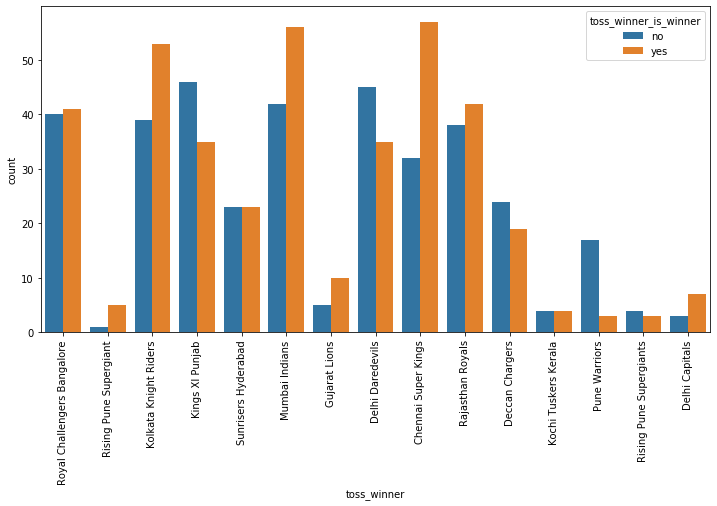

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=match_df)
plt.xticks(rotation = 'vertical')
plt.show()

It seems for Chennai Super kings (CSK) winning the toss is an indication of winning the match with high probability followed by Mumbai Indians

On the other hand, Rising Pune Supergiants end up losing the matches more often when they won the toss.

<b> Batsman Analysis </b> <br>

Let's see Top 10 batsman with high scorer.

In [60]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',
                                                                                          ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

temp_df

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


let us make up some graphical representation